# ANALYSIS OF COFFEE DATASET

In [769]:
# LOADING LIBRARIES

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
from warnings import filterwarnings

In [770]:
# LOAD THE DATASET

Actual_data = pd.read_csv("coffee_data.csv")
Actual_data.head()

,record,status_r1,status_r2,status_r3,status_r4,QDevice_r1,QDevice_r2,QDevice_r3,S1_r1,S1_r2,...,Q22_r16,Q22_r17,Q22_r18,Q22_r19,Q22_r20,Q22_r21,Q22_r22,Q22_r23,Oversample_r1,Oversample_r2
0,23,0,0,1,0,0,1,0,1,0,...,1,1,1,1,1,1,1,1,1,0
1,8,0,0,1,0,0,1,0,0,1,...,0,0,0,0,0,0,1,1,1,0
2,54,0,0,1,0,0,1,0,1,0,...,0,1,0,1,1,1,1,0,1,0
3,19,0,0,1,0,0,1,0,1,0,...,1,1,1,1,0,1,1,0,1,0
4,64,0,0,1,0,0,1,0,0,1,...,1,1,1,0,1,1,1,1,1,0


In [771]:
data = Actual_data

INFERENCE:

1. record is not required for prediction. It is just an unique value of the dataset
2. status_r1, status_r2, status_r3 = All contains value 0- Not required ,status_r4 = All contains value 1 - Not required
3. QDevice_r1, QDevice_r2, QDevice_r3 - Not required for predicting the brand of the coffee
4. MRK_Age2_r1, MRK_Age2_r2, MRK_Age2_r3 - Not required
5. Columns like S4_ are not required - Does not give any insights
6. Columns like States_Division_r1 are not required - Does not give any insights
7. Q5_r1, Q5_r2 are not required
8. Q11_ columns are not required since it is dependent variable
9. Q4_r1 is all 1, Q4_r2 is all 0 - Not required

# DATA MANIPULATION

In [772]:
# DROPPING ALL UNWANTED COLUMNS

unused_columns = []

for i in data.columns:
    if i == "record":
        unused_columns.append(i)
    elif i[:7]=="status_" :
        unused_columns.append(i)
    elif i[:8] == "QDevice_":
        unused_columns.append(i)
    elif i[:5] == 'S4_ch' :
        unused_columns.append(i)
    elif i[:8] == "MRK_Age2":
        unused_columns.append(i)
    elif i[:16]=="States_Division_":
        unused_columns.append(i)
    elif i[:3]=="Q5_":
        unused_columns.append(i)
    elif i[:11] == "Oversample_":
        unused_columns.append(i)
    elif i[:3] == "Q4_":
        unused_columns.append(i)
        
        
data = data.drop(columns = unused_columns)

In [773]:
data.head()

,S1_r1,S1_r2,MRK_Age_r1,MRK_Age_r2,MRK_Age_r3,MRK_Age_r4,MRK_Age_r5,MRK_Age_r6,S3_r1,S3_r2,...,Q22_r14,Q22_r15,Q22_r16,Q22_r17,Q22_r18,Q22_r19,Q22_r20,Q22_r21,Q22_r22,Q22_r23
0,1,0,0,0,1,0,0,0,1,0,...,1,0,1,1,1,1,1,1,1,1
1,0,1,0,0,1,0,0,0,1,0,...,1,0,0,0,0,0,0,0,1,1
2,1,0,0,0,0,1,0,0,1,0,...,1,1,0,1,0,1,1,1,1,0
3,1,0,0,0,1,0,0,0,1,0,...,1,1,1,1,1,1,0,1,1,0
4,0,1,0,0,0,0,1,0,0,0,...,1,1,1,1,1,0,1,1,1,1


In [774]:
data = data.drop(columns = ['S1_r2', 'Q11_r13'])
data.rename(columns = {'S1_r1':'Gender'}, inplace = True)


In [775]:
data = data.drop(columns = ['Q6_r2'])
data.rename(columns = {'Q6_r1':'Weekday'}, inplace = True)

TO DETERMINE THE TOP 10 PREDICTORS OF THE BRAND

In [776]:
data = data.drop(columns = ['Q11_r1', 'Q11_r2','Q11_r3', 'Q11_r4', 'Q11_r5','Q11_r6',
                           'Q11_r7', 'Q11_r8','Q11_r9', 'Q11_r10', 'Q11_r11', 'Q11_r12'])
#data.rename(columns = {'Q11_r9':'Starbucks_coffee'}, inplace = True)

In [777]:
data = data.drop(columns = ['Q14_r2'])
data.rename(columns = {'Q14_r1':'Purchased'}, inplace = True)

In [778]:
data.shape

(3035, 247)

In [779]:
# To visualize the count of target brand

def visualize_brand_count(brand):
    plt.pie(Actual_data[brand].value_counts(), 
            labels=['No','Yes'],
            autopct='%.0f%%')
    plt.show()

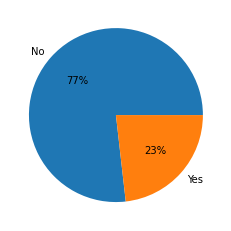

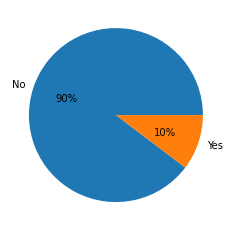

In [780]:
visualize_brand_count('Q11_r9') # Starbucks brand
visualize_brand_count('Q11_r5') # Maxwell House brand

CORRELATION METHOD

Predicting the top 10 features of the data using correlation. Correlation states the relation between variables and the output or target variable.

In [781]:
def top_correlatated_predictors(brand, data, Actual_data):
    
    data = data.join(Actual_data[brand], lsuffix="_left", rsuffix="_right")
    correlation_starbucks = data.corr(method = 'pearson')
    dic_brand_starbucks = {}
    l_brand_starbucks = []

    for i in range(0, len(correlation_starbucks[brand])):
        dic_brand_starbucks[correlation_starbucks[brand].index[i]]= abs(correlation_starbucks[brand][i])
        l_brand_starbucks.append( abs(correlation_starbucks[brand][i]))

    l_brand_starbucks.sort()

    for i in l_brand_starbucks:
        keys = [k for k, v in dic_brand_starbucks.items() if v == i]

    sorted_dict = {}
    sorted_keys = sorted(dic_brand_starbucks, key=dic_brand_starbucks.get, reverse = True)  # [1, 3, 2]

    for w in sorted_keys[:11]:
        sorted_dict[w] = dic_brand_starbucks[w]

    top10_correlated_predictors = pd.DataFrame(list(sorted_dict.items()),columns = ['Predictors','correlation_values'])
    return (top10_correlated_predictors)

In [782]:
# Top correlated attributes for starbucks brand
top_10_correlated_predictors_starbucks = top_correlatated_predictors('Q11_r9', data, Actual_data)
top_10_correlated_predictors_starbucks = top_10_correlated_predictors_starbucks.iloc[1: , :]
display(top_10_correlated_predictors_starbucks)


# Top correlated attributes for Maxwell House brand
top_10_correlated_predictors_MH = top_correlatated_predictors('Q11_r5', data, Actual_data)
top_10_correlated_predictors_MH = top_10_correlated_predictors_MH.iloc[1: , :]
display(top_10_correlated_predictors_MH)

,Predictors,correlation_values
1,Q19_r2,0.233529
2,Q17_r7,0.233268
3,Q19_r1,0.220409
4,Q13_r21,0.219152
5,Q22_r15,0.148350
6,Q22_r12,0.147155
7,Q21_r1,0.146751
8,Q22_r1,0.144770
9,Q9_r2,0.142736
10,Q15_r3,0.141253


,Predictors,correlation_values
1,Q19_r2,0.306302
2,Q9_r2,0.183846
3,Q19_r1,0.174139
4,Q21_r1,0.145967
5,Q9_r3,0.138095
6,Q19_r4,0.112537
7,Region_r4,0.094960
8,Q13_r21,0.093186
9,Q22_r1,0.092404
10,Q12_r18,0.092091


Chi-square METHOD

When two features are independent, the observed count is close to the expected count,
thus we will have smaller Chi-Square value. So high Chi-Square value indicates that the hypothesis 
of independence is incorrect. In simple words, higher the Chi-Square value the feature is 
more dependent on the response and it can be selected for model training.

In [783]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [784]:
def ch_square_features_prediction(data, Actual_data, brand): 
    
    data = data.join(Actual_data[brand], lsuffix="_left", rsuffix="_right")
    data = data.dropna() 

    X = data.drop(columns = brand)
    y = data[brand]
    
    
    chi2_features = SelectKBest(chi2, k = 10)
    fit1 = chi2_features.fit(X,y)
    return X.columns[fit1.get_support(indices=True)].tolist()
    

In [785]:
top10_chisquare_predictors_starbucks = ch_square_features_prediction(data, Actual_data, 'Q11_r9')
top10_chisquare_predictors_MH = ch_square_features_prediction(data, Actual_data, 'Q11_r5')

# MODEL IMPLEMENTATION

In [786]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


In [787]:
def LogisticRegression_implementation(columns ,data, Actual_data, brand = 'Q11_r9'):
    
    data = data[columns]
    data = data.join(Actual_data[brand], lsuffix="_left", rsuffix="_right")
    data = data.dropna() 

    
    X = data.drop(columns = brand)
    y = data[brand]
    
    #Split the data into train and test
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.2, random_state=2)
    
    # Model Implementation
    model = LogisticRegression()
    model.fit(X_train, y_train)
    X_train_prediction = model.predict(X_train)
    X_test_prediction = model.predict(X_test)

    Accuracy_train = accuracy_score(y_train, X_train_prediction)
    Accuracy_test = accuracy_score(y_test, X_test_prediction )

    print(f'Accuracy score of Training Data: {round(Accuracy_train,2)}')
    print(f'Accuracy score of Testing Data: {round(Accuracy_test,2)}')
    
    # MODEL EVALUATION
    y_pred = model.predict(X_test)
    target_names = ['No', 'Yes']
    report = classification_report(y_test, y_pred, target_names=target_names)
    print(report)
    
    filterwarnings('ignore')


In [788]:

# Starbucks
# Model prediction using all features
print("Using all the features\n")
LogisticRegression_implementation(data.columns, data, Actual_data, brand = 'Q11_r9')

print("Using predicted top 10 features\n")
# Model prediction using Selected features (method correlation)
columns = list(top_10_correlated_predictors_starbucks['Predictors'])
LogisticRegression_implementation(columns, data, Actual_data, brand = 'Q11_r9')

# Model prediction using Selected features (method chi-square)
columns = top10_chisquare_predictors_starbucks
LogisticRegression_implementation(columns, data, Actual_data, brand = 'Q11_r9')


Using all the features

Accuracy score of Training Data: 0.83
Accuracy score of Testing Data: 0.82
              precision    recall  f1-score   support

          No       0.85      0.93      0.89       469
         Yes       0.65      0.43      0.52       138

    accuracy                           0.82       607
   macro avg       0.75      0.68      0.70       607
weighted avg       0.80      0.82      0.80       607

Using predicted top 10 features

Accuracy score of Training Data: 0.78
Accuracy score of Testing Data: 0.79
              precision    recall  f1-score   support

          No       0.80      0.97      0.88       463
         Yes       0.69      0.20      0.31       144

    accuracy                           0.79       607
   macro avg       0.74      0.59      0.59       607
weighted avg       0.77      0.79      0.74       607

Accuracy score of Training Data: 0.79
Accuracy score of Testing Data: 0.8
              precision    recall  f1-score   support

          

Feature selection - Starbucks

Comparing the methods such as correlation and chi_quare score, the features selected by the chi_square
method shows improvement in f1_score from 0.31 to 0.37. Using all the features for model training, the 
f1_score is better comparitively. 

In [789]:
# Maxwell House
# Model prediction using all features
print("Using all the features\n")
LogisticRegression_implementation(data.columns, data, Actual_data, brand = 'Q11_r5')

print("Using predicted top 10 features\n")
# Model prediction using Selected features
columns = list(top_10_correlated_predictors_MH['Predictors'])
LogisticRegression_implementation(columns, data, Actual_data, brand = 'Q11_r5')


Using all the features

Accuracy score of Training Data: 0.91
Accuracy score of Testing Data: 0.89
              precision    recall  f1-score   support

          No       0.91      0.97      0.94       544
         Yes       0.42      0.22      0.29        63

    accuracy                           0.89       607
   macro avg       0.67      0.59      0.62       607
weighted avg       0.86      0.89      0.87       607

Using predicted top 10 features

Accuracy score of Training Data: 0.9
Accuracy score of Testing Data: 0.89
              precision    recall  f1-score   support

          No       0.89      1.00      0.94       541
         Yes       0.00      0.00      0.00        66

    accuracy                           0.89       607
   macro avg       0.45      0.50      0.47       607
weighted avg       0.79      0.89      0.84       607



Feature selection - Maxwell House

Comparing the methods such as correlation and chi_quare score, the features selected by the chi_square
method and correlation shows no change in f1_score that is 0. Using all the features for model training, the 
f1_score is 0.29. Since the data is imbalanced, accuracy does not give correct results

In [790]:
from sklearn.ensemble import ExtraTreesClassifier 


In [791]:
def feature_importance_using_trees(data, columns, Actual_data, brand):
    
    data = data[columns]
    data = data.join(Actual_data[brand], lsuffix="_left", rsuffix="_right")
    data = data.dropna() 

    
    X = data.drop(columns = brand)
    y = data[brand]
    
    
    model = ExtraTreesClassifier() 
    model.fit(X,y)
    
    feat_importances = pd.Series(model.feature_importances_, index=X.columns) 
    feat_importances.nlargest(10).plot(kind='barh') 
    plt.show()
    
    #model_RFC = RandomForestClassifier(n_estimators = 340)
    #model_RFC.fit(X,y)

    importances = model.feature_importances_
    final_df = pd.DataFrame({"Features": pd.DataFrame(X).columns, "Importances": importances})
    final_df.set_index('Importances')
    final_df = final_df.sort_values("Importances", ascending=False)
    
    return final_df.head(10)

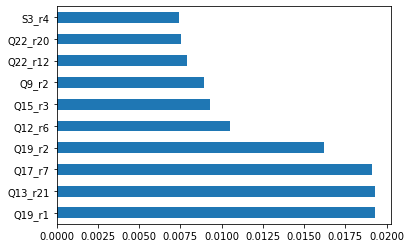

,Features,Importances
203,Q19_r1,0.019327
153,Q13_r21,0.019284
177,Q17_r7,0.019114
204,Q19_r2,0.016237
107,Q12_r6,0.010495
157,Q15_r3,0.009283
73,Q9_r2,0.008947
235,Q22_r12,0.007918
243,Q22_r20,0.007520
10,S3_r4,0.007405


In [792]:
features_ = feature_importance_using_trees(data, data.columns, Actual_data, 'Q11_r9')
features_.reset_index(drop = True)
features_

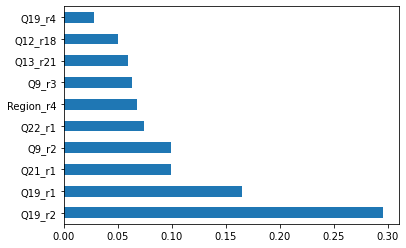

,Features,Importances
0,Q19_r2,0.295159
2,Q19_r1,0.164643
3,Q21_r1,0.098990
1,Q9_r2,0.098780
8,Q22_r1,0.074311
6,Region_r4,0.067677
4,Q9_r3,0.063548
7,Q13_r21,0.058979
9,Q12_r18,0.049772
5,Q19_r4,0.028142


In [793]:
features_ = feature_importance_using_trees(data, columns, Actual_data, 'Q11_r5')
features_.reset_index(drop = True)
features_